In [127]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [128]:
np.random.seed(42)

In [129]:
# df = pd.read_excel('1.xlsx')
df = pd.read_csv('2.csv')
Predict_Case = ['A+','A-','B+','B-','AB+','AB-','O+','O-']
df.set_index('Record Date', inplace=True)
df.index = pd.to_datetime(df.index)
days_to_predict = 30

C:\Users\Potter\AppData\Local\Temp\ipykernel_7908\1501474546.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.index = pd.to_datetime(df.index)


In [130]:
def data_split(data, look_back=1):
    x, y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        x.append(a)
        y.append(data[i + look_back, 0])
    return np.array(x), np.array(y)

In [131]:
dataset = df.filter([Predict_Case[1]])
print(dataset)

             A-
Record Date    
2015-01-01    0
2015-02-01    3
2015-03-01    0
2015-04-01    0
2015-05-01    2
...          ..
2022-07-17    0
2022-07-18    0
2022-07-19    0
2022-07-20    2
2022-07-21    1

[2759 rows x 1 columns]


In [141]:
test_size = int(dataset.shape[0] * 0.3)
all = dataset[:]
train = dataset[:-test_size]
test = dataset[-test_size:]
print(test[0:6])
# print(train.shape)

             A-
Record Date    
2020-04-16    0
2020-04-17    1
2020-04-18    1
2020-04-19    0
2020-04-20    0
2020-04-21    0


In [107]:
# scaler = MinMaxScaler(feature_range=(-1, 1))
# scaler = scaler.fit(dataset)
# all = scaler.transform(dataset)
# train = scaler.transform(train)
# test = scaler.transform(test)
# all = np.array(dataset)
# all =all.values.tolist()
all =all.values.tolist()
all = np.array(all)
train =train.values.tolist()
train = np.array(train)
test = test.values.tolist()
print(len(test))
test = np.array(test)

184


In [108]:
look_back = 60
X_all, Y_all = data_split(all, look_back=look_back)
X_train, Y_train = data_split(train, look_back=look_back)
X_test, Y_test = data_split(test, look_back=look_back)

# We need to convert the shape of the data to LSTM shape format (samples, timesteps, features)
# To make a model can learning from a sequence, we'll using timesteps for timeseries prediction
# X_train[0].shape

In [109]:
# X_train = X_train.reshape(1, X_train.shape[0], X_train.shape[1])
# Y_train = Y_train.reshape(1, Y_train.shape[0], Y_train.shape[1])
# X_test = X_test.reshape(1, X_test.shape[0], X_test.shape[1])
# Y_test = Y_test.reshape(1, Y_test.shape[0], Y_test.shape[1])

In [110]:
batch_size = 30
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1,look_back)))
model.add(LSTM(units=50))
model.add(Dense(1))
# model.add(LSTM(units=50, return_sequences=True,input_shape=(1,5), 
#                 stateful=True))
# model.add(LSTM(units=50))


In [111]:
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [112]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train.shape) 
# x = x.reshape(1, x.shape[0], x.shape[1])
history = model.fit(X_train, Y_train, epochs=15, batch_size=8, validation_data=(X_test, Y_test), verbose=1, shuffle=False)


(371, 1, 60)
Epoch 1/15
47/47 [==============================] - 6s 36ms/step - loss: 1.4177 - val_loss: 0.6891
Epoch 2/15
47/47 [==============================] - 0s 7ms/step - loss: 1.2608 - val_loss: 0.7233
Epoch 3/15
47/47 [==============================] - 0s 8ms/step - loss: 1.1746 - val_loss: 0.7295
Epoch 4/15
47/47 [==============================] - 0s 9ms/step - loss: 1.0586 - val_loss: 0.7487
Epoch 5/15
47/47 [==============================] - 0s 6ms/step - loss: 0.9210 - val_loss: 0.7918
Epoch 6/15
47/47 [==============================] - 0s 5ms/step - loss: 0.7733 - val_loss: 0.8406
Epoch 7/15
47/47 [==============================] - 0s 6ms/step - loss: 0.6160 - val_loss: 0.8745
Epoch 8/15
47/47 [==============================] - 0s 6ms/step - loss: 0.4539 - val_loss: 0.8928
Epoch 9/15
47/47 [==============================] - 0s 7ms/step - loss: 0.3085 - val_loss: 0.8999
Epoch 10/15
47/47 [==============================] - 0s 6ms/step - loss: 0.2029 - val_loss: 0.9078
Epoch

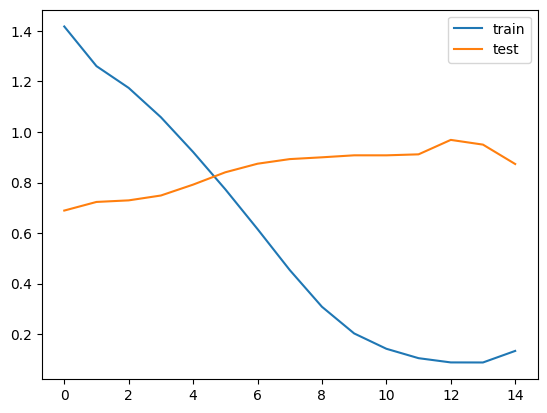

In [113]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [126]:

# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
# print(X_test.shape)
# x = np.array([1, 4, 5, 6,4])
# x = x.reshape(1, 5)
# x = x.reshape(x.shape[0], 1, x.shape[1]) 
# print(model.predict(x))
# print(Y_train[1])

0


In [115]:
X_data1 = X_test[-1:]
# X_data1[0, 0, 0] = 8
# X_data1[0, 0, 1] = 4
# X_data1[0, 0, 2] = 2
# X_data1[0, 0, 3] = 5
# X_data1[0, 0, 4] = 4
# X_data1[0, 0, 5] = 8
# X_data1[0, 0, 6] = 5
# X_data1[0, 0, 7] = 8
# X_data1[0, 0, 8] = 4
# X_data1[0, 0, 9] = 6
# X_data1[0, 0, 10] = 10
# X_data1[0, 0, 11] = 5
# X_data1[0, 0, 12] = 2
# X_data1[0, 0, 13] = 3
# X_data1[0, 0, 14] = 6
# X_data1[0, 0, 15] = 2
# X_data1[0, 0, 16] = 6
# X_data1[0, 0, 17] = 8
# X_data1[0, 0, 18] = 5
# X_data1[0, 0, 19] = 9
# X_data1[0, 0, 20] = 7
# X_data1[0, 0, 21] = 3
# X_data1[0, 0, 22] = 1
# X_data1[0, 0, 23] = 8
# X_data1[0, 0, 24] = 11
# X_data1[0, 0, 25] = 8
# X_data1[0, 0, 26] = 9
# X_data1[0, 0, 27] = 5
# X_data1[0, 0, 28] = 7
# X_data1[0, 0, 29] = 1
# X_data1[0, 0, 0] = 8
# X_data1[0, 0, 1] = 4
# X_data1[0, 0, 2] = 2
# X_data1[0, 0, 3] = 5
# X_data1[0, 0, 4] = 4
print(X_data1[0,0,9])
# xxx =model.predict(X_data1)
# print(xxx)

1


In [116]:

def change(datax1, pred):
    temp = datax1[0, 0, 0]
    for j in range(look_back-1):
        datax1[0, 0, j] = datax1[0, 0, j+1]
        # print("ssssefef",datax[i])
    datax1[0, 0, look_back-1] = pred    
    return datax1

In [117]:
future_predict = []
for k in range(30):
    pred = model.predict(X_data1)
    pred1 = change(X_data1, pred)
    print(k, "awdwd", pred, "adawdawd")
    pred = np.array(pred).flatten()
    future_predict.append(pred)

1/1 [==============================] - 1s 1s/step
0 awdwd [[0.19249628]] adawdawd
1/1 [==============================] - 0s 31ms/step
1 awdwd [[0.1352445]] adawdawd
1/1 [==============================] - 0s 24ms/step
2 awdwd [[0.5752864]] adawdawd
1/1 [==============================] - 0s 26ms/step
3 awdwd [[-0.02736423]] adawdawd
1/1 [==============================] - 0s 32ms/step
4 awdwd [[0.7227832]] adawdawd
1/1 [==============================] - 0s 33ms/step
5 awdwd [[0.983508]] adawdawd
1/1 [==============================] - 0s 30ms/step
6 awdwd [[0.15743639]] adawdawd
1/1 [==============================] - 0s 27ms/step
7 awdwd [[0.022977]] adawdawd
1/1 [==============================] - 0s 32ms/step
8 awdwd [[0.49688905]] adawdawd
1/1 [==============================] - 0s 37ms/step
9 awdwd [[0.03629958]] adawdawd
1/1 [==============================] - 0s 27ms/step
10 awdwd [[0.35786664]] adawdawd
1/1 [==============================] - 0s 26ms/step
11 awdwd [[-0.09761392]] adawda

In [118]:
# all_predict_flatten = np.array(scaler.inverse_transform(np.array(future_predict))).flatten().astype('int')

all_predict_flatten = np.array(future_predict).flatten().astype('int')



In [119]:

all_predict_flatten = np.absolute(all_predict_flatten)
print(all_predict_flatten)
# print(future_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
